In [102]:
%load_ext autoreload
%autoreload 2

In [108]:
import json
from collections import Counter
from hazm import word_tokenize , Normalizer
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

In [188]:
with open('../data/result.json') as f:
    data = json.load(f)
    

In [192]:
stop_words = open('stop_words.txt').readlines()
stop_words = list(map(str.strip, stop_words))


In [197]:
text_content=''
for msg in data['messages']:
    if type(msg['text']) is str:        
        tokens = word_tokenize(msg['text'])
        tokens=list(filter(lambda item:item not in stop_words,tokens))
        
        text_content += f" {' '.join(tokens)}"
        
        

In [203]:
text_content=text_content[:20000]

In [204]:
normalizer = Normalizer()
text_content = normalizer.normalize(text_content)
tokens=word_tokenize(text_content)

In [205]:
text = arabic_reshaper.reshape(text_content)
text = get_display(text)

In [206]:
#text='مریم پدمدمد '
wordcloud = WordCloud(font_path = './BHoma.ttf',background_color='white').generate(text)

(-0.5, 399.5, 199.5, -0.5)

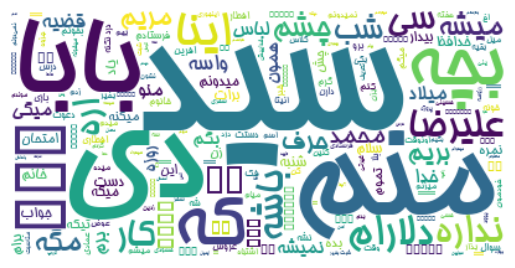

In [207]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
